In [12]:
# Import all necessary libaries 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from datetime import datetime,datetime
from sklearn.cluster import KMeans


# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import dataset 

In [30]:
import pandas as pd

In [32]:
#Mall dataset
mall=pd.read_csv(r'H:\IT FOLDER\MACHINELEARINING\Mall_Customers.csv')

In [33]:
# Read the dataset
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
#Chke the information
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**No null count in dataset**
**all columns datatype is correct**
**There are 5 columns in dataset**
**one column is categorical and other are numerical**

In [35]:
#Numerical data description
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Min age is 18 and max is 70**
**min income is 15$ and max 137$**


In [36]:
mall.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


**female are shopping most out of 200 112 times are females means 56%**

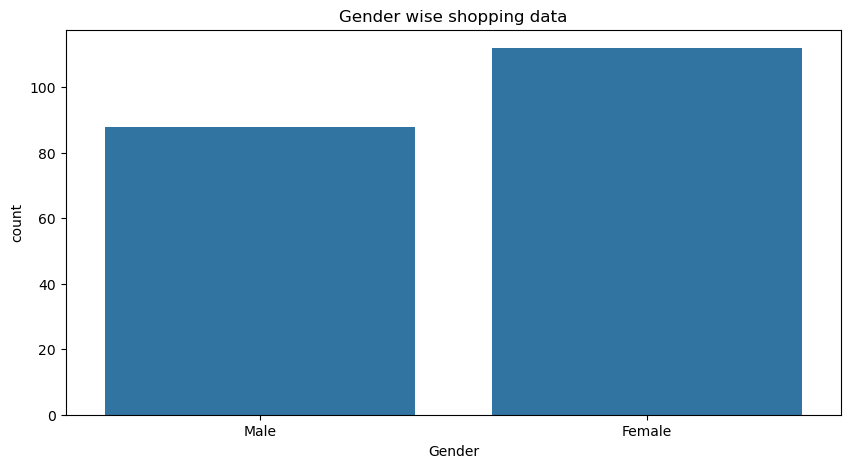

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=mall)
plt.title('Gender wise shopping data')
plt.show()

**count of female is more than male silghtly**

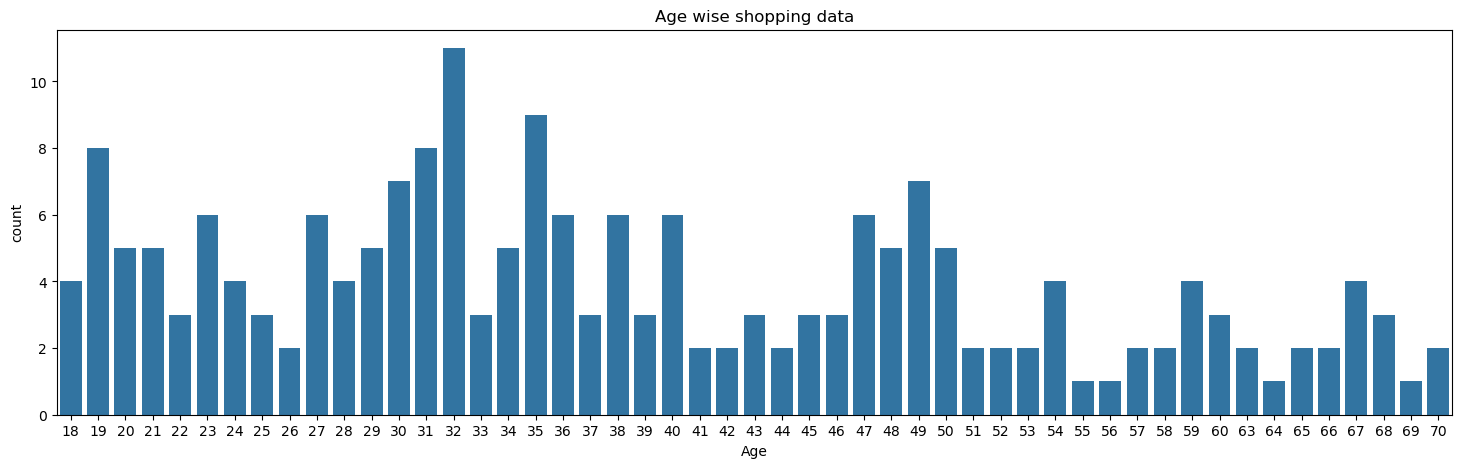

In [39]:
plt.figure(figsize=(18
                    ,5))
sns.countplot(x='Age',data=mall)
plt.title('Age wise shopping data')
plt.show()

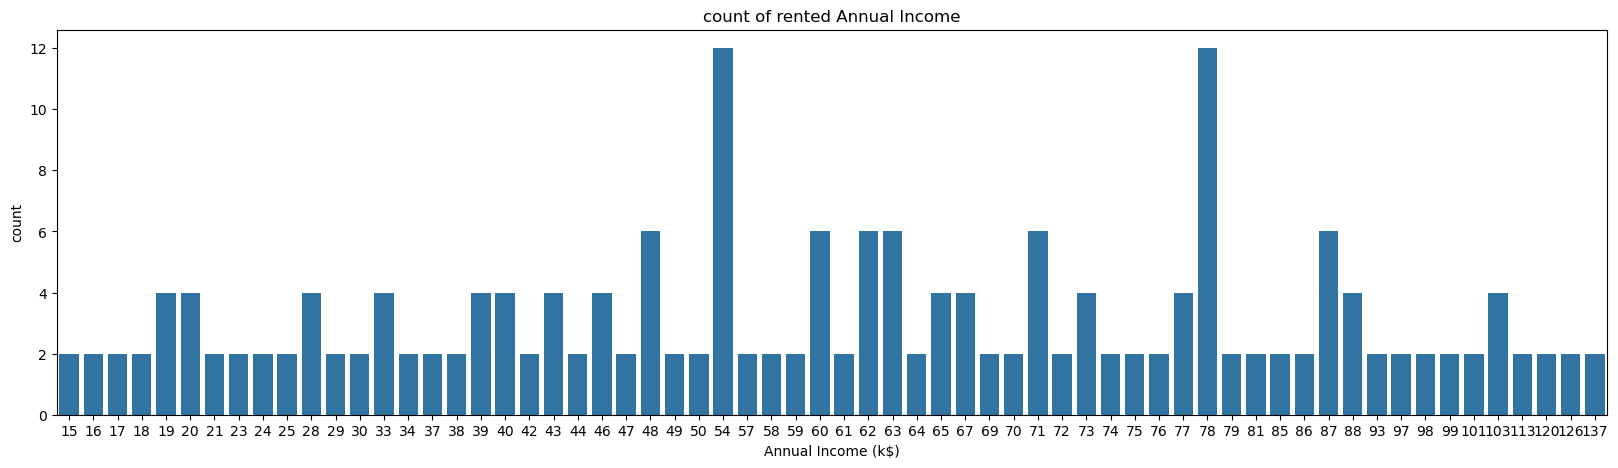

In [72]:
plt.figure(figsize=(20,5))
sns.countplot(x='Annual Income (k$)',data=mall)
plt.title('count of rented Annual Income')
plt.show()

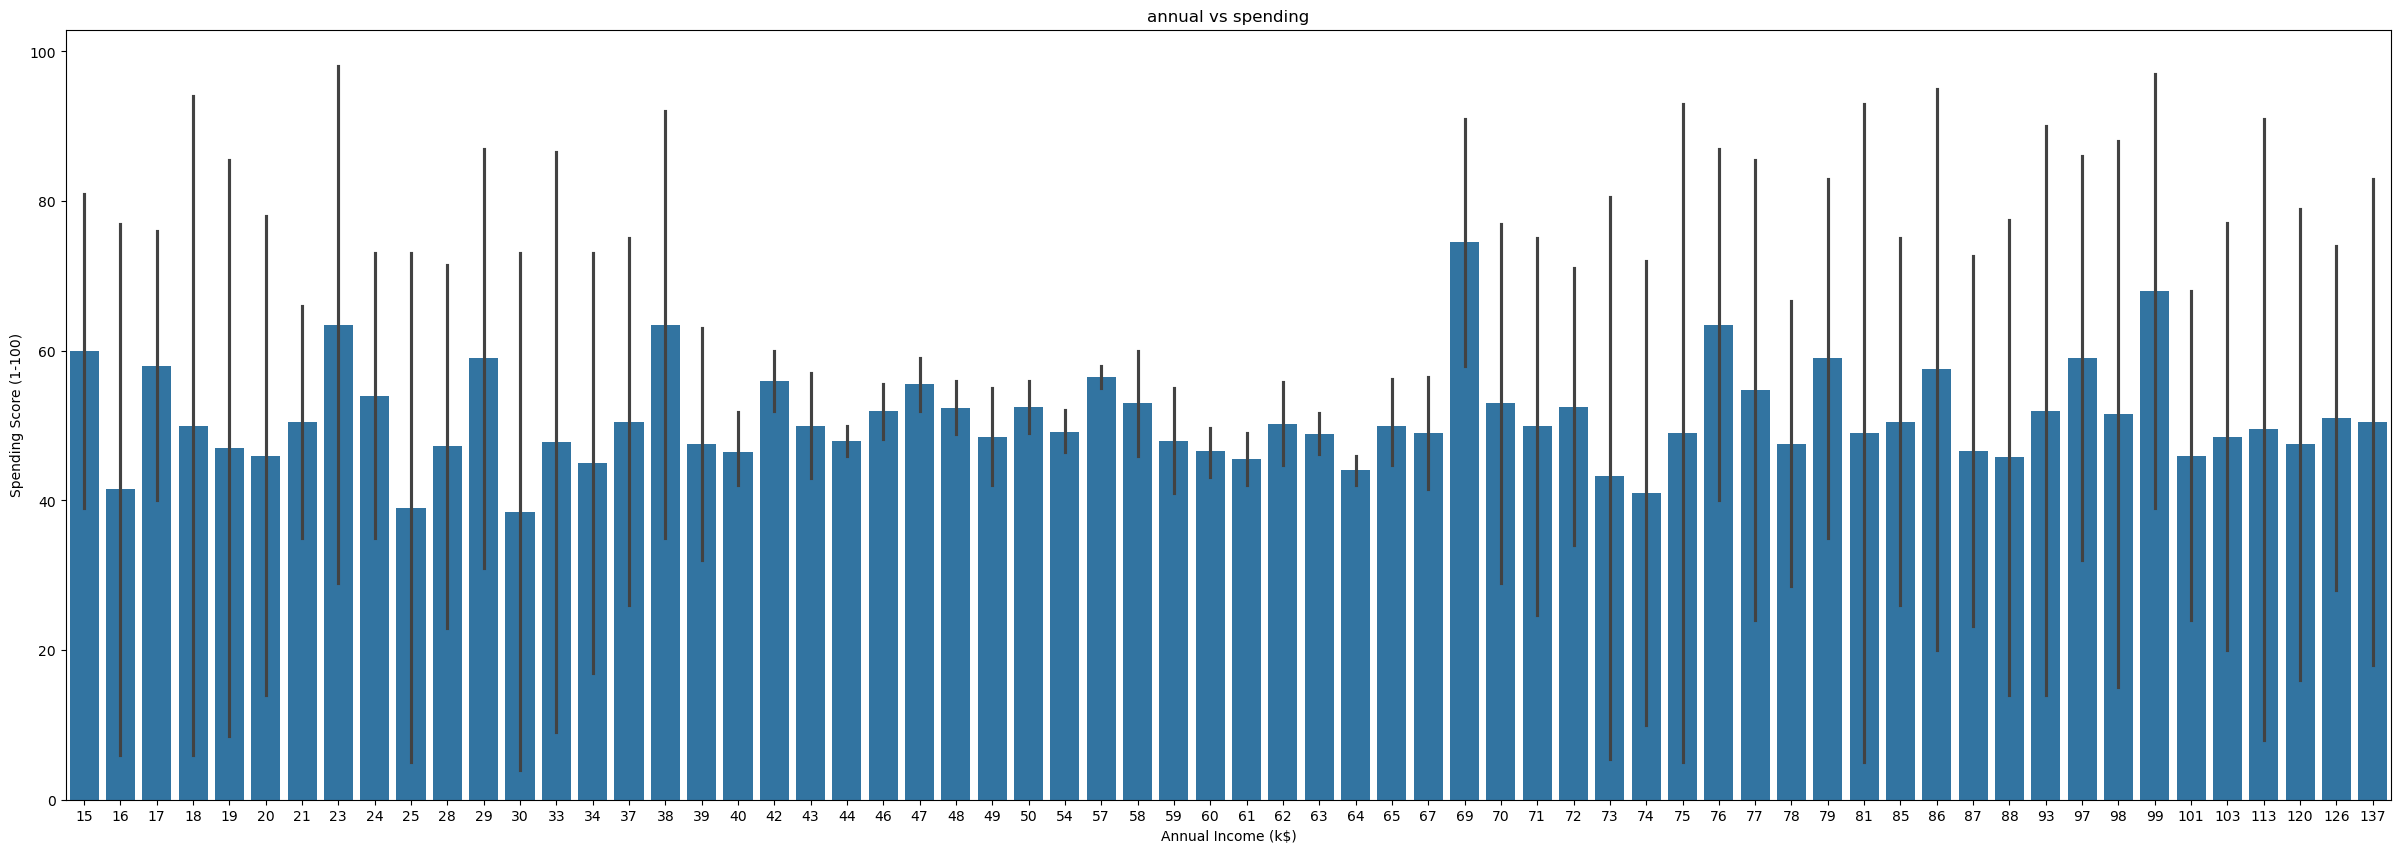

In [75]:
plt.figure(figsize=(30,10))
sns.barplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=mall)
plt.title('annual vs spending')
plt.show()

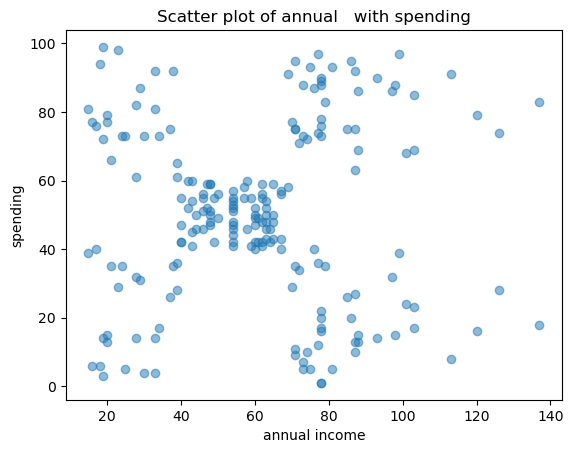

In [77]:
plt.scatter(mall['Annual Income (k$)'],mall['Spending Score (1-100)'], alpha=0.5)
plt.title('Scatter plot of annual   with spending')
plt.xlabel('annual income')
plt.ylabel('spending')
plt.show()

**highest count of age is 32**

In [40]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

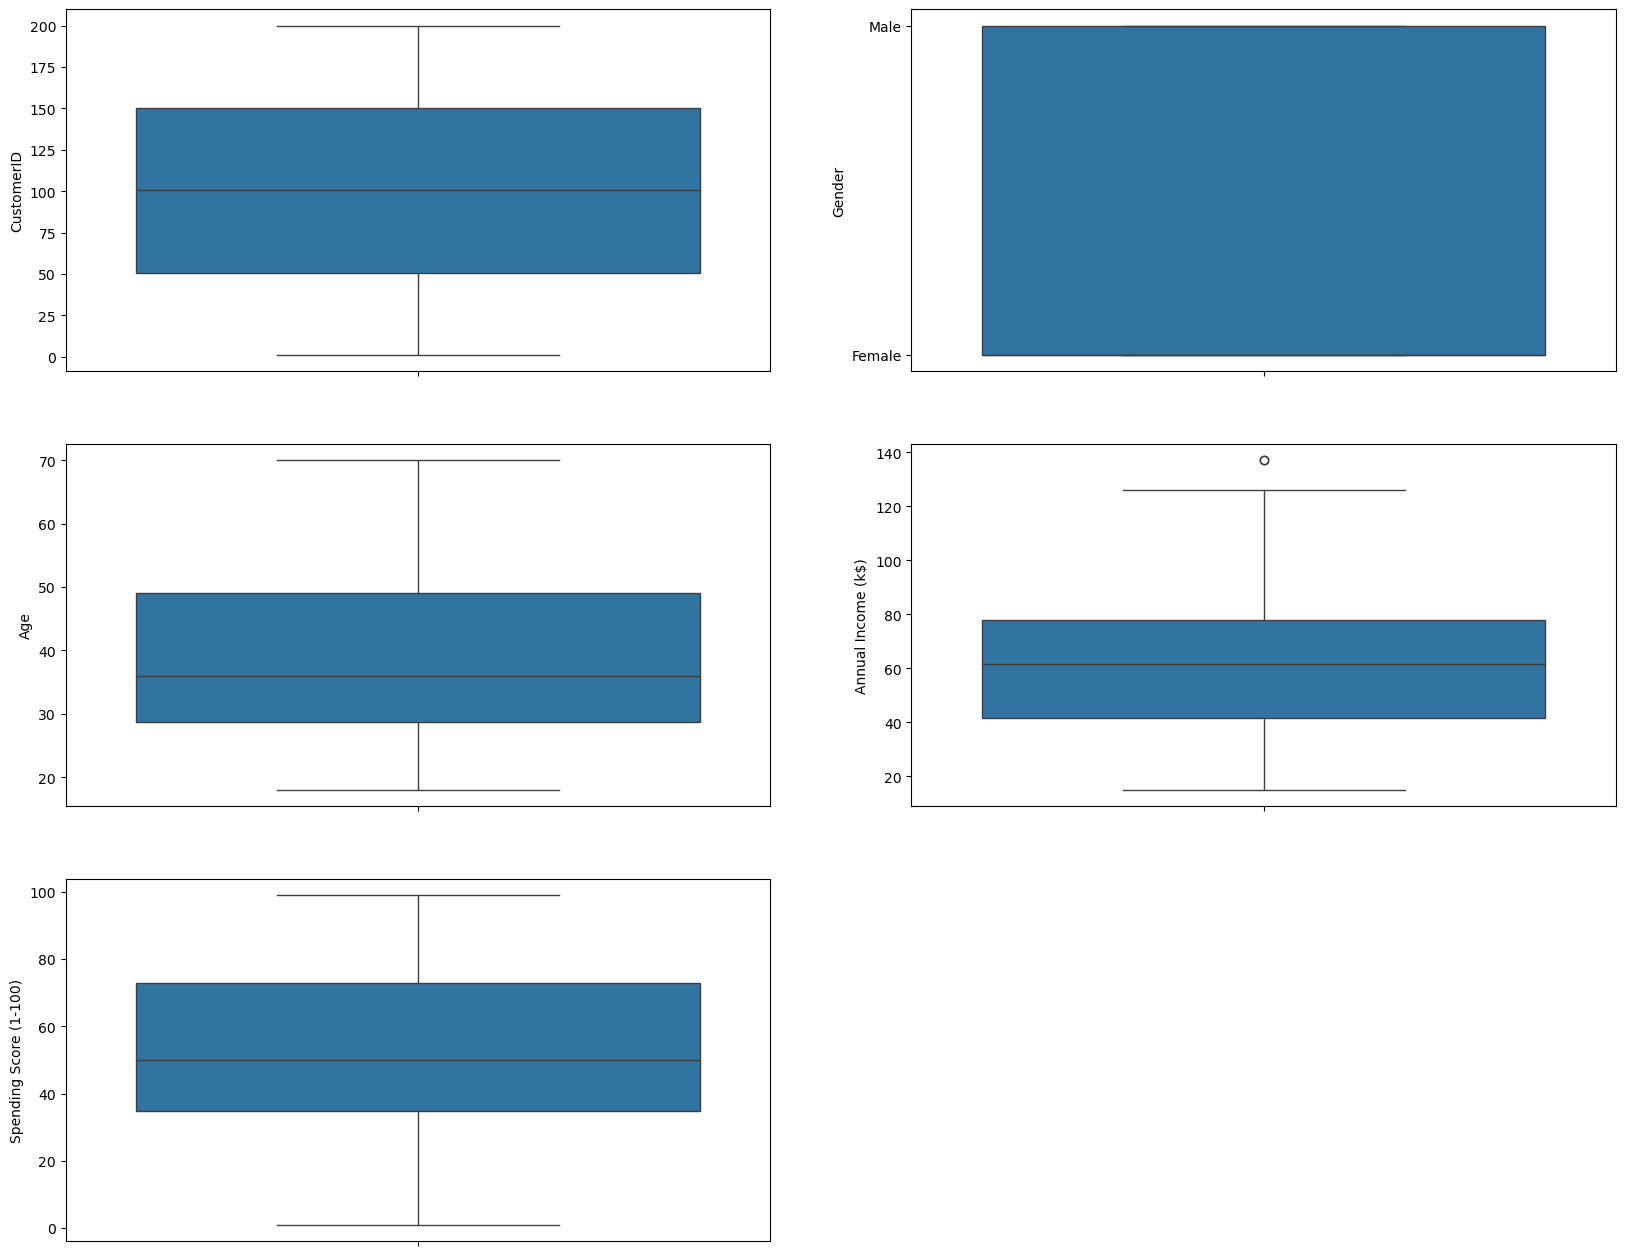

In [41]:
list1=['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
plt.figure(figsize=(20,16))
for index,item in enumerate(list1):
  plt.subplot(3,2,index+1)
  sns.boxplot(mall[item])

**Dataset is free from outliers**

In [42]:
#seprate the categorical and numerical data seprate
mall_cat_df = mall.select_dtypes(include=['object'])

mall_num_df = mall.select_dtypes(include=['float64','int64','int32'])

# Check for skewness

In [44]:
#import skewness libarary
from scipy.stats import skew


CustomerID
0.0


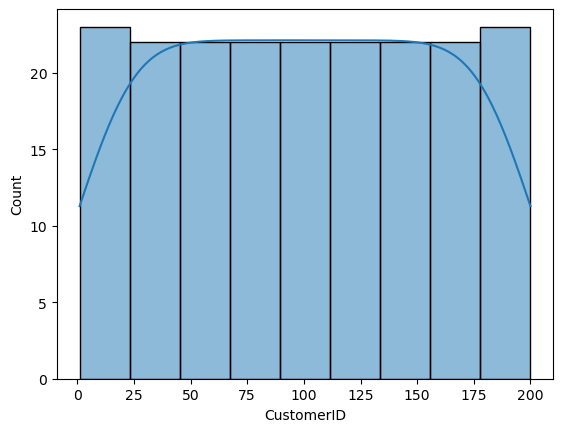

Age
0.48191947090957177


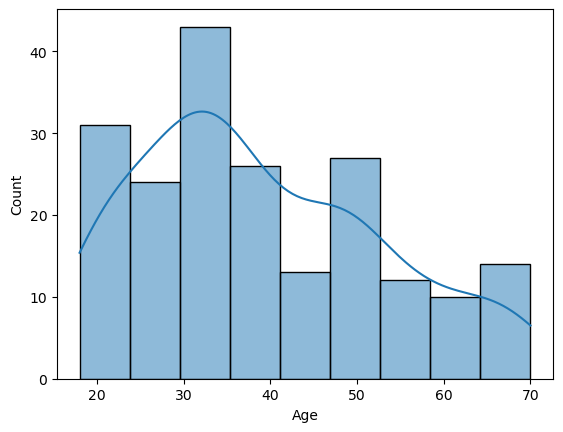

Annual Income (k$)
0.319423684276314


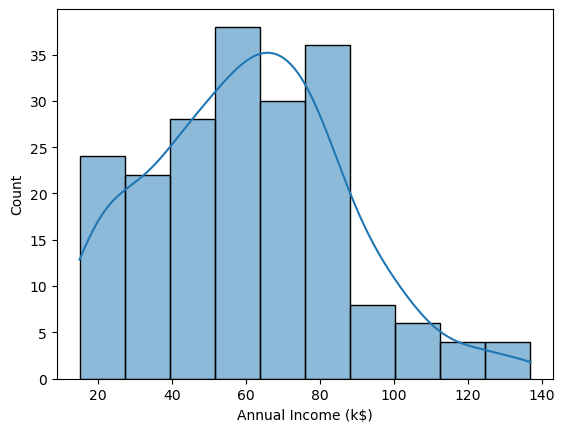

Spending Score (1-100)
-0.04686530945553505


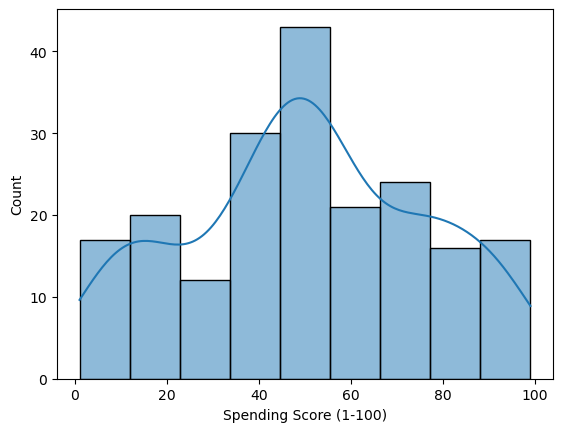

In [45]:
#check the skewness of each column and treat required column with sqrt or log method
for col in mall_num_df:
    print(col)
    print(skew(mall_num_df[col]))

    plt.figure()
    sns.histplot(mall_num_df[col], kde=True)
    plt.show()

**No need to treat skewness as values are within range**

## convert categorical column into numerical

In [46]:
mall_cat_df.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [47]:
mall_cat_df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [48]:
#One hot encoding
mall_cat_gender=pd.get_dummies(mall_cat_df['Gender'],dtype='int64')

In [56]:
mall_new=pd.concat([mall_num_df,mall_cat_gender],axis=1)

In [57]:
mall_new.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


# Import standard scaler to scale the data

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()

In [60]:
mall_final=scaler.fit_transform(mall_new)

In [65]:
columns = list(mall_num_df.columns) + list(mall_cat_gender.columns)

In [66]:
mall_final_df = pd.DataFrame(mall_final, columns=columns)

In [69]:
mall_final_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,-1.723412,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


In [79]:
mall_final_df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Female', 'Male'],
      dtype='object')

In [80]:
X=mall_final_df[['Annual Income (k$)','Spending Score (1-100)']]

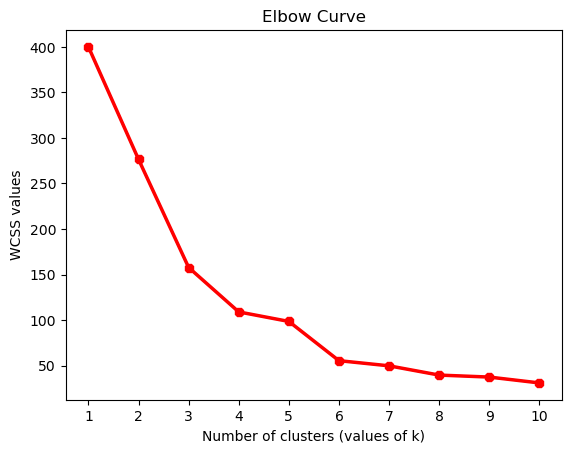

In [87]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
# the elbow curve
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))

plt.show()

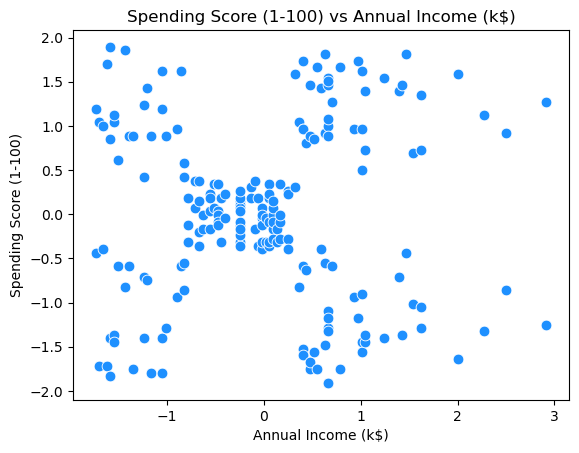

In [92]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=X, s=60, color="dodgerblue")

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

plt.show()

In [83]:
# taking k = 5
k_means_1 = KMeans(n_clusters=9, n_init="auto")

# fitting the input data
k_means_1.fit(X)

# predicting the labels of the input data
y_pred = k_means_1.predict(X)

# adding the labels to a column named label
mall_final_df["label"] = y_pred

mall_final_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male,label
0,-1.723412,-1.424569,-1.738999,-0.434801,-1.128152,1.128152,2
1,-1.706091,-1.281035,-1.738999,1.195704,-1.128152,1.128152,3
2,-1.688771,-1.352802,-1.700830,-1.715913,0.886405,-0.886405,7
3,-1.671450,-1.137502,-1.700830,1.040418,0.886405,-0.886405,3
4,-1.654129,-0.563369,-1.662660,-0.395980,0.886405,-0.886405,2


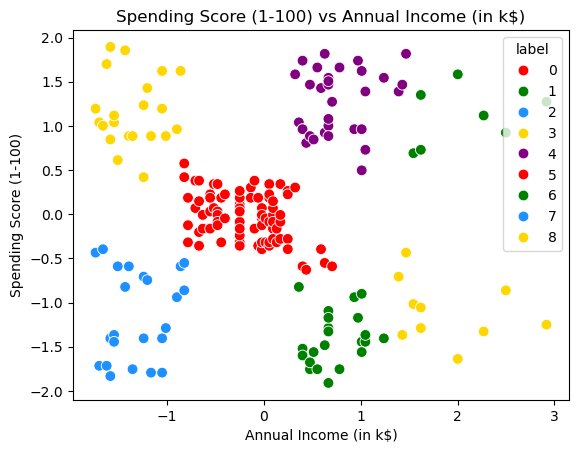

In [97]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]

# scatterplot of the clusters
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="label", 
    palette=colors, 
    legend="full", 
    data=mall_final_df, 
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()